**Partie 2**

**Exercice 1   — Heart Attack Analysis & Prediction Dataset**

1. Charger le dataset “heart.csv”.

In [76]:
import pandas as pd

heart_data = pd.read_csv('heart.csv')



2. Afficher les données

In [77]:
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3. Proposer deux modèles à base d’arbre de décision l’un basé sur le gain d’information et l’autre sur l’indice de Gini.

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# création du modèle d'arbre de décision basé sur le gain d'information
dtc_gain = DecisionTreeClassifier(criterion='entropy')

# création du modèle d'arbre de décision basé sur l'indice de Gini
dtc_gini = DecisionTreeClassifier(criterion='gini')


from sklearn.model_selection import train_test_split


# Séparation des données en ensembles d'entraînement et de test
X = heart_data.iloc[:, :-1]
y=heart_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entraînement des modèles
dtc_gain.fit(X_train, y_train)
dtc_gini.fit(X_train, y_train)

# Prédiction des labels sur l'ensemble de test
y_pred_gain = dtc_gain.predict(X_test)
y_pred_gini = dtc_gini.predict(X_test)





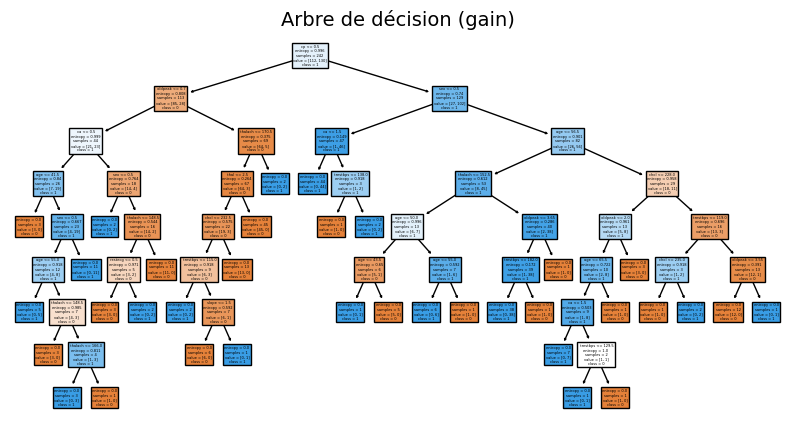

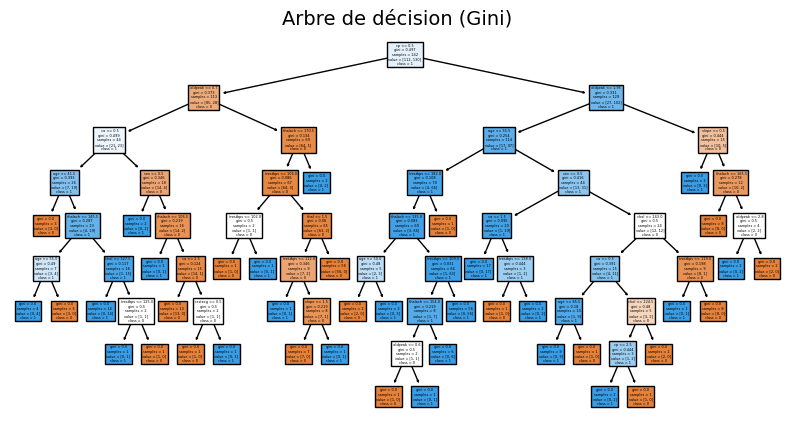

In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Affichage de l'arbre de décision basé sur le gain d'information
plt.figure(figsize=(10,5))
plot_tree(dtc_gain, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title('Arbre de décision (gain)', fontsize=14)
plt.show()

# Affichage de l'arbre de décision basé sur l'indice de Gini
plt.figure(figsize=(10,5))
plot_tree(dtc_gini, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title('Arbre de décision (Gini)', fontsize=14)
plt.show()


4. Comparer les deux modèles.

In [80]:
from sklearn.metrics import accuracy_score, f1_score
# Évaluation des performances
accuracy_gain = accuracy_score(y_test, y_pred_gain)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
f1_gain = f1_score(y_test, y_pred_gain)
f1_gini = f1_score(y_test, y_pred_gini)

print("Modèle d'arbre de décision basé sur le gain d'information:\nAccuracy: {:.3f}, F1 Score: {:.3f}".format(accuracy_gain, f1_gain))
print("Modèle d'arbre de décision basé sur l'indice de Gini:\nAccuracy: {:.3f}, F1 Score: {:.3f}".format(accuracy_gini, f1_gini))


Modèle d'arbre de décision basé sur le gain d'information:
Accuracy: 0.738, F1 Score: 0.758
Modèle d'arbre de décision basé sur l'indice de Gini:
Accuracy: 0.705, F1 Score: 0.719


5. Visualiser les résultats graphiquement.

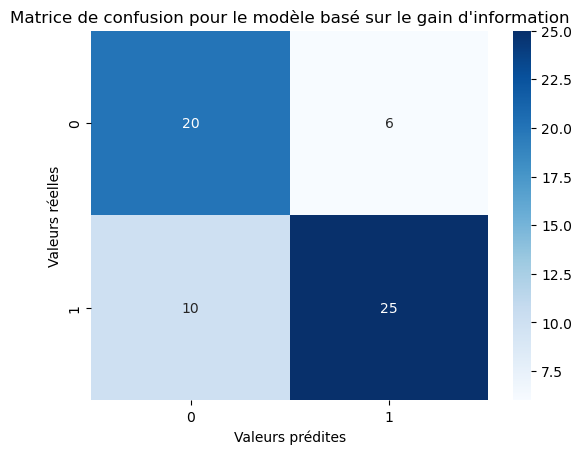

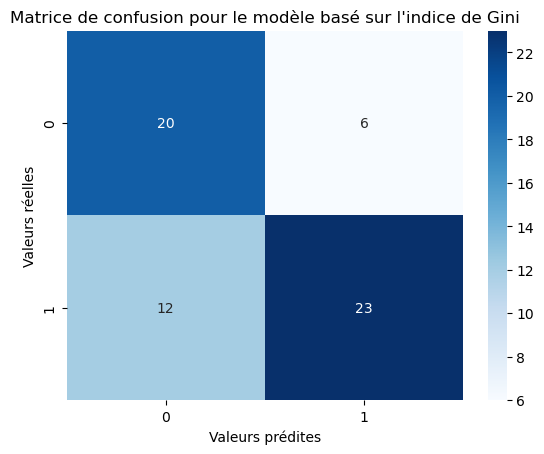

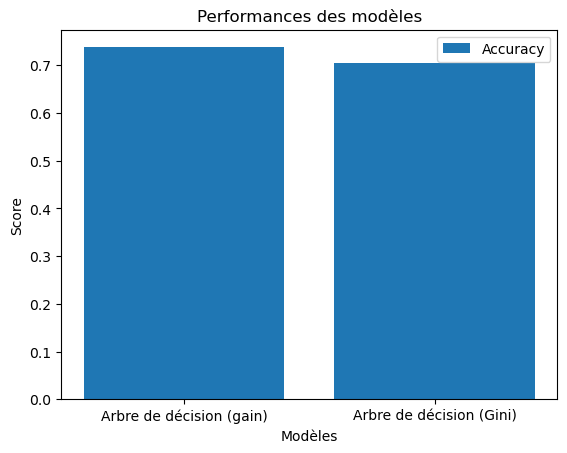

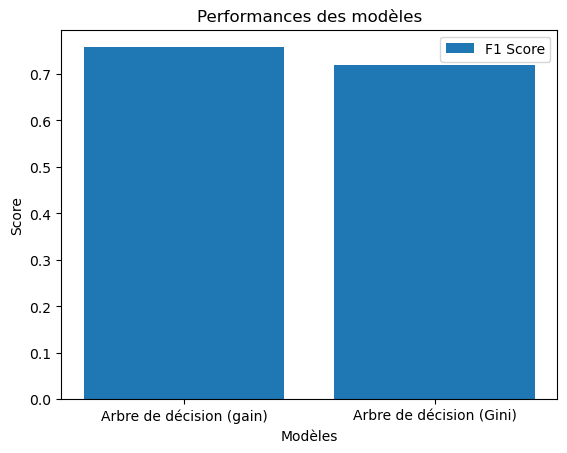

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Créer les matrices de confusion pour les deux modèles
cm_info_gain = confusion_matrix(y_test, y_pred_gain)
cm_gini = confusion_matrix(y_test, y_pred_gini)

# Afficher les matrices de confusion
sns.heatmap(cm_info_gain, annot=True, cmap='Blues')
plt.title("Matrice de confusion pour le modèle basé sur le gain d'information")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

sns.heatmap(cm_gini, annot=True, cmap='Blues')
plt.title("Matrice de confusion pour le modèle basé sur l'indice de Gini")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()


# Définition des noms des modèles
model_names = ['Arbre de décision (gain)', 'Arbre de décision (Gini)']

# Calcul des précisions et des scores F1 pour les deux modèles
accuracies = [accuracy_gain, accuracy_gini]
f1_scores = [f1_gain, f1_gini]

# Création d'un graphique à barres
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, label='Accuracy')
ax.set_xlabel('Modèles')
ax.set_ylabel('Score')
ax.set_title('Performances des modèles')
ax.legend()

plt.show()

fig, ax = plt.subplots()
ax.bar(model_names, f1_scores, label='F1 Score')
ax.set_xlabel('Modèles')
ax.set_ylabel('Score')
ax.set_title('Performances des modèles')
ax.legend()

plt.show()
